# EDA

Importo las librerias a utilizar

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import nltk
import string
from ydata_profiling import ProfileReport
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Descargar recursos necesarios
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Clarita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Cargo solo las columnas a utilizar 

In [3]:
df_completo= pd.read_csv('database/base_datos.csv')
df_EDA = df_completo[['id', 'title', 'budget', 'original_language', 'popularity', 'runtime', 'vote_average', 'vote_count', 'name_genres', 'Name_cast','Director', 'release_month', 'release_year']]

In [4]:
df_EDA.head()

id                        title      budget original_language  \
0    862                    Toy Story  30000000.0                en   
1   8844                      Jumanji  65000000.0                en   
2  15602             Grumpier Old Men         0.0                en   
3  31357            Waiting to Exhale  16000000.0                en   
4  11862  Father of the Bride Part II         0.0                en   

   popularity  runtime  vote_average  vote_count  \
0   21.946943     81.0           7.7      5415.0   
1   17.015539    104.0           6.9      2413.0   
2   11.712900    101.0           6.5        92.0   
3    3.859495    127.0           6.1        34.0   
4    8.387519    106.0           5.7       173.0   

                          name_genres  \
0   ['Animation', 'Comedy', 'Family']   
1  ['Adventure', 'Fantasy', 'Family']   
2               ['Romance', 'Comedy']   
3      ['Comedy', 'Drama', 'Romance']   
4                          ['Comedy']   

                                           Name_cast             Director  \
0  ['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...    ['John Lasseter']   
1  ['Robin Williams', 'Jonathan Hyde', 'Kirsten D...     ['Joe Johnston']   
2  ['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...    ['Howard Deutch']   
3  ['Whitney Houston', 'Angela Bassett', 'Loretta...  ['Forest Whitaker']   
4  ['Steve Martin', 'Diane Keaton', 'Martin Short...    ['Charles Shyer']   

   release_month  release_year  
0             10          1995  
1             12          1995  
2             12          1995  
3             12          1995  
4              2          1995

Use data profiling para tener un entendimiento de los datos que estoy manejando

In [5]:
#prof = ProfileReport(df_EDA)
#prof.to_file(output_file='profiling.html')

# Correlaciones de las variables

In [6]:
#Calculo la matriz de correlación
correlation_matrix = df_EDA.corr()

C:\Users\Clarita\AppData\Local\Temp\ipykernel_2564\3297632757.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_EDA.corr()


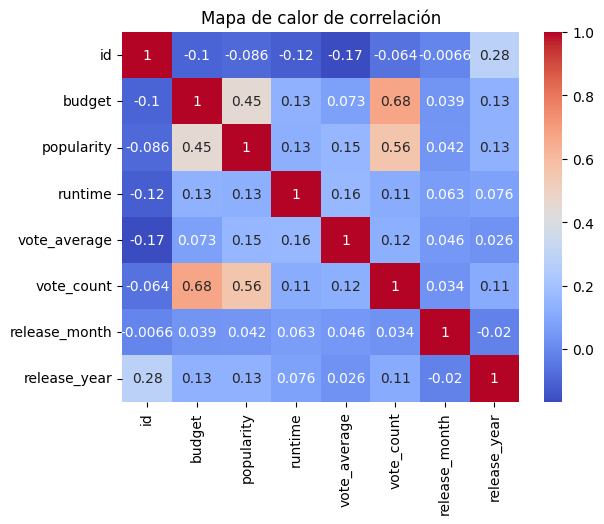

In [7]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

Existe una alta correlación entre popularity, budget y vote_count. Voy a revisar más adelante la variable vote_average ya que, por la definición de las variables, debería estar relacionada con popularity 
 

In [8]:
df_EDA.describe()

id        budget    popularity       runtime  vote_average  \
count   44837.000000  4.483700e+04  44837.000000  44601.000000  44837.000000   
mean   106925.113768  4.273734e+06      2.936897     94.349432      5.628088   
std    111095.377676  1.753223e+07      6.011851     38.238363      1.908666   
min         2.000000  0.000000e+00      0.000000      0.000000      0.000000   
25%     26203.000000  0.000000e+00      0.393975     85.000000      5.000000   
50%     59115.000000  0.000000e+00      1.138972     95.000000      6.000000   
75%    153854.000000  0.000000e+00      3.732537    107.000000      6.800000   
max    469172.000000  3.800000e+08    547.488298   1256.000000     10.000000   

         vote_count  release_month  release_year  
count  44837.000000   44837.000000  44837.000000  
mean     111.201530       6.464237   1991.834400  
std      494.551584       3.627512     24.005446  
min        0.000000       1.000000   1874.000000  
25%        3.000000       3.000000   1978.000000  
50%       10.000000       7.000000   2001.000000  
75%       35.000000      10.000000   2010.000000  
max    14075.000000      12.000000   2020.000000

## Reviso la cantidad de ceros por variable 
### En el describe budget, revenue muestran tener grandes cantidades

In [9]:
(df_EDA == 0).sum()

id                       0
title                    0
budget               35999
original_language        0
popularity              39
runtime               1506
vote_average          2880
vote_count            2784
name_genres              0
Name_cast                0
Director                 0
release_month            0
release_year             0
dtype: int64

 Cuando realice el análisis de cada variable numérica para comprender su distribución utilizaré dos enfoques, uno con ceros y otra sin ceros para obtener una comprensión más completa de la distribución.

# Distribución de variables numéricas

### Budget

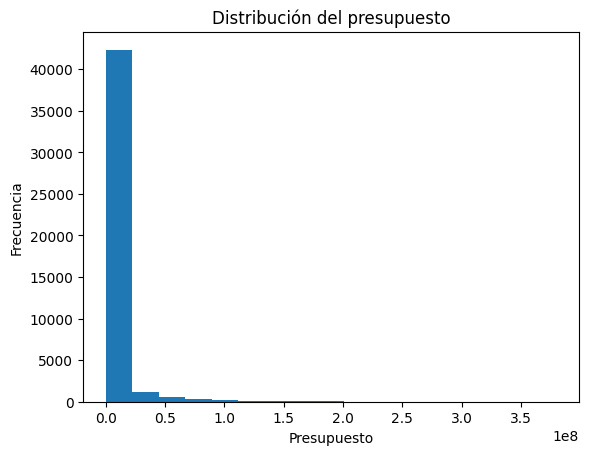

In [10]:
plt.hist(df_EDA['budget'], bins='auto')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.title('Distribución del presupuesto')
plt.show()

#### Creamos una máscara para ver la distribución de la variable sin ceros

In [11]:
mask = df_EDA['budget'] != 0

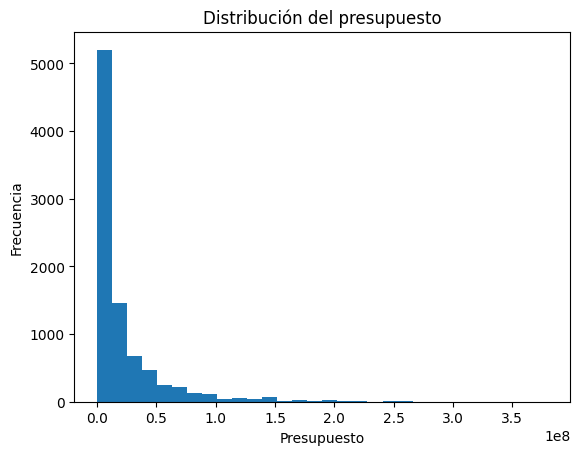

In [12]:
plt.hist(df_EDA[mask]["budget"], bins=30)
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.title('Distribución del presupuesto')
plt.show()

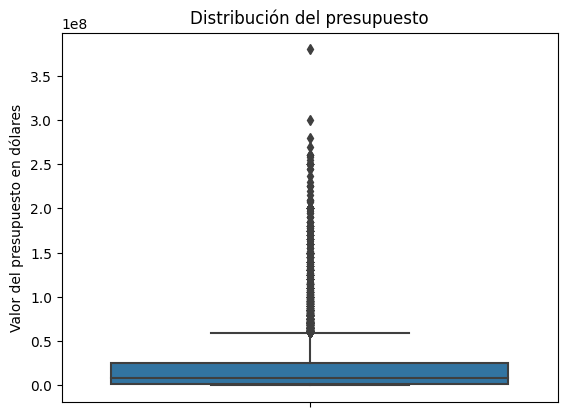

In [13]:
sns.boxplot(data= df_EDA[mask], y="budget")
plt.ylabel('Valor del presupuesto en dólares')
plt.title('Distribución del presupuesto')
plt.show()

De estos gráficos y los datos proporcionados por el pandas profiling puedo inferir que la variable budget tiene un 80% de datos en valor cero y que en general el presupuesto de las películas es menor a 1 millón 

### Popularity

C:\Users\Clarita\AppData\Local\Temp\ipykernel_2564\2653766367.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_EDA['popularity'], shade=True)


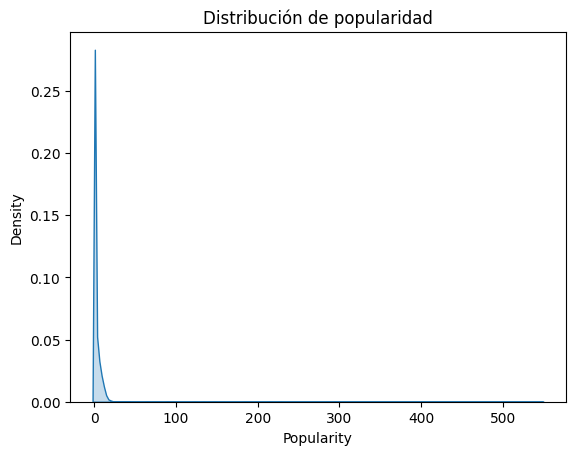

In [14]:
sns.kdeplot(df_EDA['popularity'], shade=True)
plt.xlabel('Popularity')
plt.title('Distribución de popularidad')
plt.show()

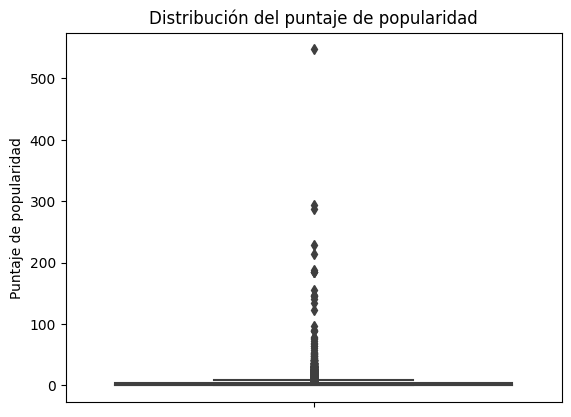

In [15]:
sns.boxplot(data=df_EDA, y="popularity")
plt.ylabel('Puntaje de popularidad')
plt.title('Distribución del puntaje de popularidad')
plt.show()

De estos gráficos y los datos proporcionados por el pandas profiling puedo inferir que la variable popularity tiene algún tipo de error en sus valores, ya que su mediana es 1.13 y sus valores máximos están por encima del 500, mostrando una distribución sin sentido a la hora de evaluar la popularidad de una película. Teniendo en cuenta esto, decidí eliminar esta variable

In [16]:
df_EDA.drop(["popularity"], axis=1, inplace=True)

C:\Users\Clarita\AppData\Local\Temp\ipykernel_2564\2503017920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EDA.drop(["popularity"], axis=1, inplace=True)


### Runtime

C:\Users\Clarita\AppData\Local\Temp\ipykernel_2564\1604016441.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_EDA['runtime'], shade=True)


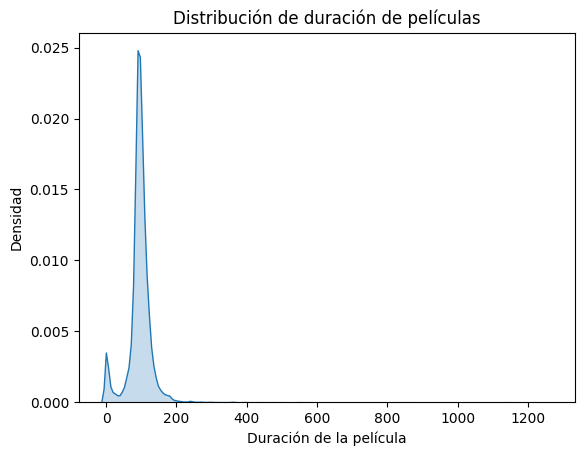

In [17]:
sns.kdeplot(df_EDA['runtime'], shade=True)
plt.xlabel('Duración de la película')
plt.ylabel('Densidad')
plt.title('Distribución de duración de películas')
plt.show()

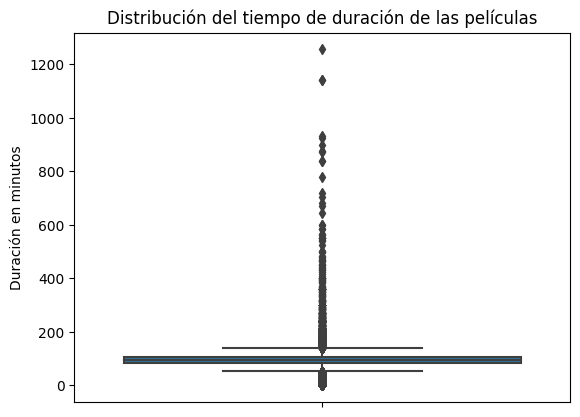

In [18]:
sns.boxplot(data=df_EDA, y="runtime")
plt.ylabel('Duración en minutos')
plt.title('Distribución del tiempo de duración de las películas')
plt.show()

In [19]:
df_EDA[(df_EDA["runtime"] > 0) & (df_EDA["runtime"] < 15)]

id                                          title    budget  \
1079   141210                                  The Sleepover       0.0   
1990    53565                               Steamboat Willie    4986.0   
3306    54825                              Creature Comforts  500000.0   
4321    36107                                           More       0.0   
9401    15990                                  The Cathedral       0.0   
...       ...                                            ...       ...   
44693  253612  Live Forever as You Are Now with Alan Resnick  750000.0   
44694  350548                              The Salad Mixxxer       0.0   
44745  233880                       At the Ends of the Earth       0.0   
44746  214157                                        Gagarin       0.0   
44802  176407                                    Soviet Toys       0.0   

      original_language  runtime  vote_average  vote_count  \
1079                 en      6.0           8.0         1.0   
1990                 en      8.0           7.4        76.0   
3306                 en      5.0           7.3        29.0   
4321                 xx      6.0           7.9        45.0   
9401                 en      6.0           7.4        16.0   
...                 ...      ...           ...         ...   
44693                en     11.0           0.0         0.0   
44694                en     11.0           0.0         0.0   
44745                ru      8.0           7.2        11.0   
44746                ru      3.0           6.7         7.0   
44802                en     11.0           5.2         6.0   

                            name_genres  \
1079                          ['Drama']   
1990                          ['Drama']   
3306    ['Action', 'Crime', 'Thriller']   
4321                    ['Documentary']   
9401               ['Drama', 'Romance']   
...                                 ...   
44693              ['Drama', 'History']   
44694                                []   
44745                                []   
44746  ['TV Movie', 'Drama', 'Romance']   
44802              ['History', 'Drama']   

                                               Name_cast  \
1079   ['Miou-Miou', 'Daniel Auteuil', 'Pascal Duquen...   
1990   ['Matt Dillon', 'Jim Metzler', 'Meg Tilly', 'E...   
3306   ['Charles Bronson', 'Jill Ireland', 'Vincent G...   
4321                                ['James Earl Jones']   
9401   ['Massimo Girotti', 'Raoul Bova', 'Filippo Nig...   
...                                                  ...   
44693  ['Heather Langenkamp', 'Samantha Mumba', 'Kerr...   
44694  ['Yoo Hae-jin', 'Lee Joon', 'Jo Yoon-hee', 'Li...   
44745  ['Naomi Nero', 'Daniel Botelho', 'Dani Nefusi'...   
44746  ['Richard Cromwell', 'Helen Mack', 'Lionel Atw...   
44802  ['Langen Han', 'Jin Yan', 'Wong Yan-Mei', 'Ye ...   

                                Director  release_month  release_year  
1079                   ['Chris Cullari']             10          2013  
1990                     ['Walt Disney']             11          1928  
3306                       ['Nick Park']              7          1989  
4321                    ['Mark Osborne']              1          1998  
9401                  ['Tomek Baginski']             10          2002  
...                                  ...            ...           ...  
44693    ['Alan Resnick', "Ben O'Brien"]             12          2013  
44694  ['Ken Marino', 'David Soldinger']             10          2014  
44745             ['Konstantin Bronzit']              1          1999  
44746               ['Alexij Kharitidi']              1          1994  
44802                   ['Dziga Vertov']              3          1924  

[779 rows x 12 columns]

De estos gráficos y los datos proporcionados por el pandas profiling puedo inferir que la variable runtime tiene algunos datos erroneos, algunas anomalías y gran parte de sus datos dentro de "lo esperado" para la duración de una película.
En los datos erroneos observamos que el 3,4% es cero y esa no podría ser la duración de una película.<br>
En la parte de anomalías tenemos dos tipos, las películas con duración menor a 15 minutos que representan solo el 1.6% del total, que son una mezcla entre valores erroneos y algunos cortos (que si podrían tener esa duración).<br>
Los otros valores atípicos los encontramos por arriba del 95-th percentile con valores superiores a 150 minutos que creo que ya no son valores válidos para una película, buscando información sobre algunos de estos títulos llegue a la conclusión de que se trata de series televisivas o de errores de duración.<br>


### Vote average

C:\Users\Clarita\AppData\Local\Temp\ipykernel_2564\791112397.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_EDA['vote_average'], shade=True)


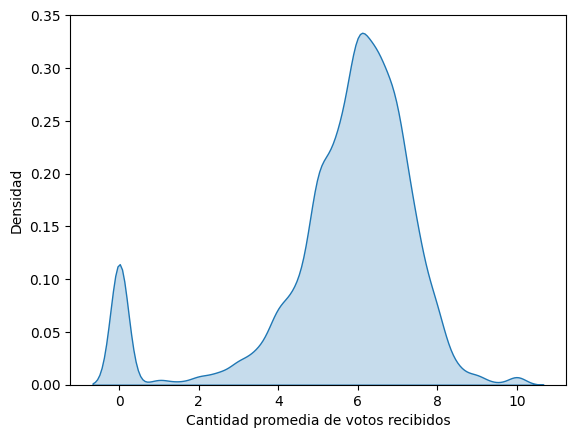

In [20]:
sns.kdeplot(df_EDA['vote_average'], shade=True)
plt.xlabel('Cantidad promedia de votos recibidos')
plt.ylabel('Densidad')
plt.show()

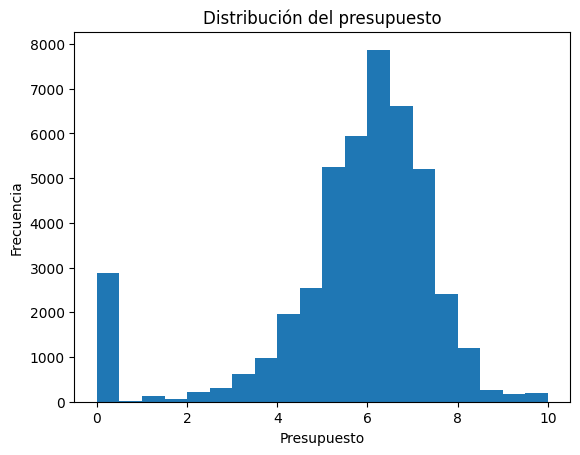

In [21]:
plt.hist(df_EDA["vote_average"], bins=20)
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.title('Distribución del presupuesto')
plt.show()

A partir de los gráficos y los datos del Pandas Profiling en donde muestra que la mayor frecuencia de datos se encuentra en los números enteros, tomé la decisión de convertir los datos a valores enteros para simplificar la columna a la hora de pasarla al modelo

#### Convertí vote_average a valores enteros

In [22]:
df_EDA["vote_average"] = round(df_EDA["vote_average"])

C:\Users\Clarita\AppData\Local\Temp\ipykernel_2564\4239995756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EDA["vote_average"] = round(df_EDA["vote_average"])


### Vote  Count

C:\Users\Clarita\AppData\Local\Temp\ipykernel_2564\136387594.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_EDA['vote_count'], shade=True)


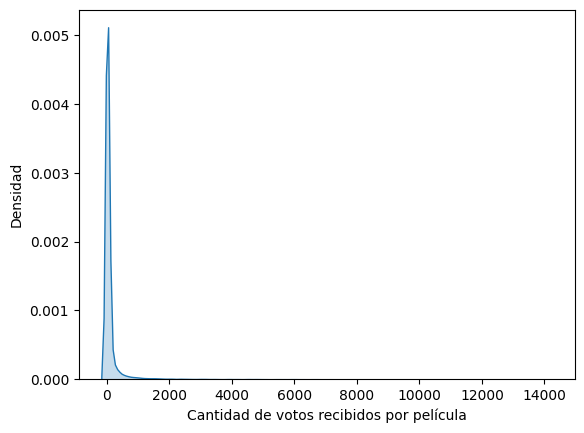

In [23]:
sns.kdeplot(df_EDA['vote_count'], shade=True)
plt.xlabel('Cantidad de votos recibidos por película')
plt.ylabel('Densidad')
plt.show()

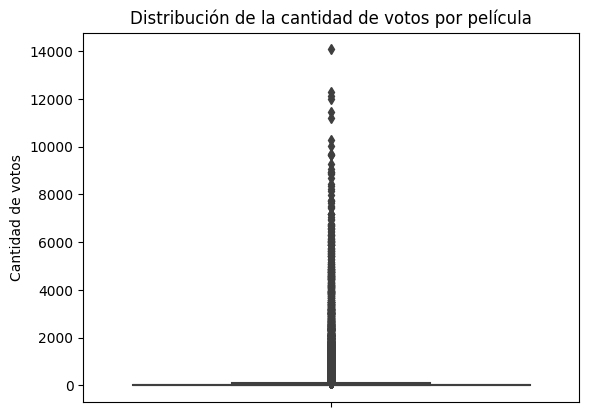

In [24]:
sns.boxplot(data=df_EDA, y="vote_count")
plt.ylabel('Cantidad de votos')
plt.title('Distribución de la cantidad de votos por película')
plt.show()

Teniendo en cuenta los gráficos y los datos obtenidos del Pandas Profiling puedo inferir que la columna vote_count está sesgada a la derecha teniendo una gran cantidad de películas poco votadas, el máximo de votos por película hasta el tercer cuartil son solo 35 votos. Los outliers de esta columna son interesantes investigar o tener en cuenta ya que son películas con hasta 12.000 votos

### Release Year

C:\Users\Clarita\AppData\Local\Temp\ipykernel_2564\358749113.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_EDA['release_year'], shade=True)


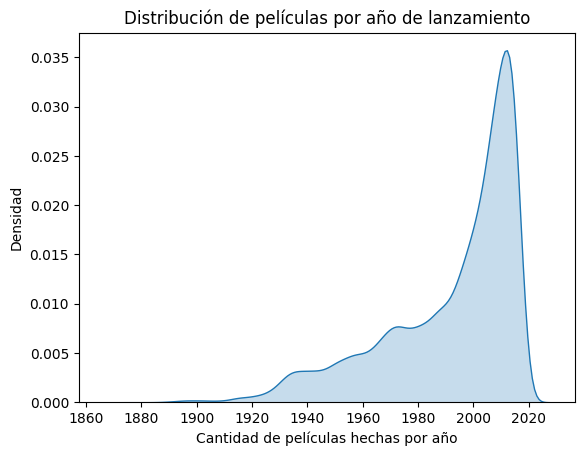

In [25]:
sns.kdeplot(df_EDA['release_year'], shade=True)
plt.xlabel('Cantidad de películas hechas por año')
plt.ylabel('Densidad')
plt.title('Distribución de películas por año de lanzamiento')
plt.show()

### Teniendo en cuenta la cantidad de ceros por variable, voy a realizar un df sin valor cero para mirar si alguna correlación se modifica

In [26]:
df_sinceros = df_EDA.replace(0, np.nan)

In [27]:
#Calculo la matriz de correlación
correlation_matrix2 = df_sinceros.corr()

C:\Users\Clarita\AppData\Local\Temp\ipykernel_2564\2328642996.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2 = df_sinceros.corr()


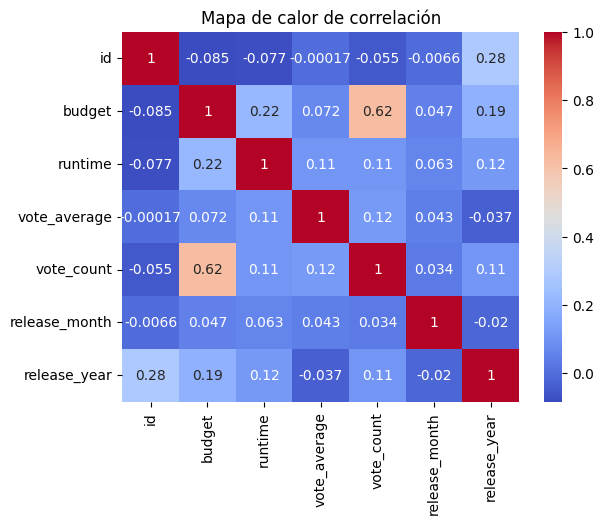

In [28]:
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

# Nubes de palabras 

### Los actores que aparecen en más cantidad de películas

In [29]:
df_EDA["Name_cast"][2]

"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret', 'Sophia Loren', 'Daryl Hannah', 'Burgess Meredith', 'Kevin Pollak']"

In [30]:
#Para ver la frecuencia en la que aparecen los actores vamos a convertirlo todo en una gran lista
name_cast_lists = df_EDA["Name_cast"].apply(ast.literal_eval)

# Crear una lista plana con los nombres de los actores
actor_names = [actor for sublist in name_cast_lists for actor in sublist]


In [31]:
freq_actores = nltk.FreqDist(actor_names)
freq_actores

FreqDist({'Bess Flowers': 241, 'Christopher Lee': 144, 'Samuel L. Jackson': 123, 'John Wayne': 122, 'Michael Caine': 110, 'Donald Sutherland': 109, 'Gérard Depardieu': 109, 'Frank Welker': 107, 'Jackie Chan': 106, 'John Carradine': 106, ...})

(-0.5, 999.5, 999.5, -0.5)

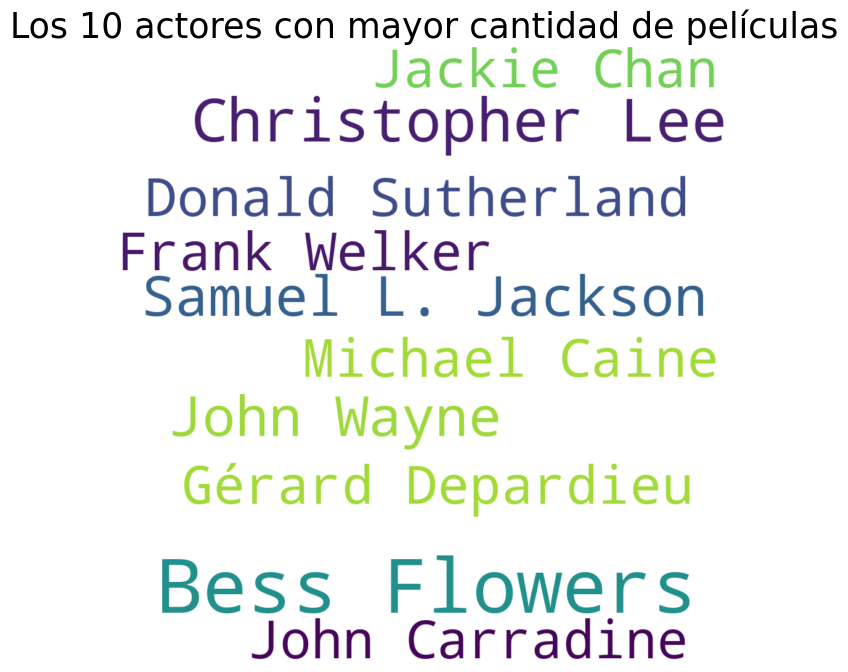

In [32]:
wordcloud = WordCloud(width=1000, height=1000, background_color='white', max_words=10).generate_from_frequencies(freq_actores)

plt.figure(figsize=(8,8))
plt.title("Los 10 actores con mayor cantidad de películas", fontsize=25)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

Buscando información sobre los actores, encontré que Bess Flowers la actriz que más frecuencia tiene es una actriz reconocida por su trabajo como extra. Lo cual muestra que los actores que aparecen en la mayor cantidad de películas no son los más famosos. Para una futura investigación me parecería interesante dejar los actores cuyas películas tengan mayor puntaje o aplicar un filtro de alguna manera para que aparezcan los actores "más conocidos"

### Los directores que aparecen en mayor cantidad de películas

In [33]:
df_EDA["Director"]

0                            ['John Lasseter']
1                             ['Joe Johnston']
2                            ['Howard Deutch']
3                          ['Forest Whitaker']
4                            ['Charles Shyer']
                         ...                  
44832    ['Amleto Palermi', 'Giorgio Bianchi']
44833                        ['Mario Mattoli']
44834                    ['Penelope Spheeris']
44835                ['Marco Tullio Giordana']
44836                         ['Maggie Peren']
Name: Director, Length: 44837, dtype: object

In [34]:
#Convertimos los directores en una sola lista
directores = df_EDA['Director'].apply(ast.literal_eval)

# Crear una lista plana con los nombres de los actores
lista_directores = [director for sublist in directores for director in sublist]

In [35]:
freq_directores = nltk.FreqDist(lista_directores)
freq_directores

FreqDist({'John Ford': 68, 'Michael Curtiz': 65, 'Werner Herzog': 55, 'Alfred Hitchcock': 53, 'Jean-Luc Godard': 50, 'Woody Allen': 49, 'Sidney Lumet': 45, 'Charlie Chaplin': 44, 'William A. Wellman': 43, 'Henry Hathaway': 43, ...})

(-0.5, 999.5, 999.5, -0.5)

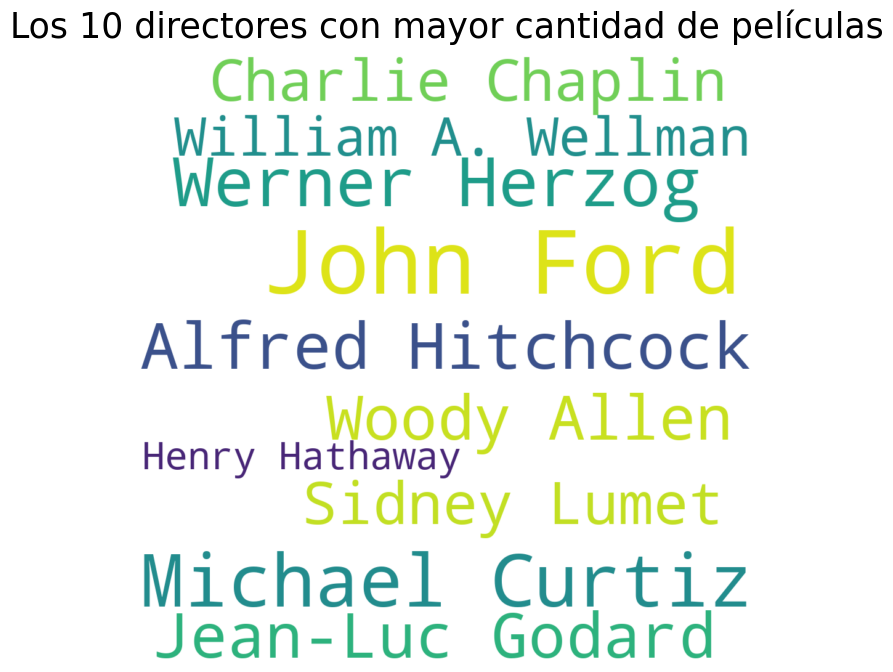

In [36]:
wordcloud = WordCloud(width=1000, height=1000, background_color='white', max_words=10).generate_from_frequencies(freq_directores)

plt.figure(figsize=(8,8))
plt.title("Los 10 directores con mayor cantidad de películas", fontsize=25)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

### Generos que tienen mayor cantidad de películas

In [37]:
df_EDA["name_genres"]

0         ['Animation', 'Comedy', 'Family']
1        ['Adventure', 'Fantasy', 'Family']
2                     ['Romance', 'Comedy']
3            ['Comedy', 'Drama', 'Romance']
4                                ['Comedy']
                        ...                
44832         ['Music', 'Family', 'Comedy']
44833                 ['Thriller', 'Drama']
44834                                    []
44835               ['Animation', 'Family']
44836         ['Crime', 'Comedy', 'Action']
Name: name_genres, Length: 44837, dtype: object

In [38]:
#Convertimos los generos en una sola lista
generos = df_EDA['name_genres'].apply(ast.literal_eval)

# Crear una lista plana con los nombres de los generos
lista_generos = [genero for sublist in generos for genero in sublist]

In [39]:
lista_generos

['Animation',
 'Comedy',
 'Family',
 'Adventure',
 'Fantasy',
 'Family',
 'Romance',
 'Comedy',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Action',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Romance',
 'Action',
 'Adventure',
 'Drama',
 'Family',
 'Action',
 'Adventure',
 'Thriller',
 'Adventure',
 'Action',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Family',
 'Animation',
 'Adventure',
 'History',
 'Drama',
 'Action',
 'Adventure',
 'Drama',
 'Crime',
 'Drama',
 'Romance',
 'Crime',
 'Comedy',
 'Crime',
 'Comedy',
 'Adventure',
 'Action',
 'Comedy',
 'Crime',
 'Comedy',
 'Thriller',
 'Crime',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Crime',
 'Thriller',
 'Drama',
 'Fantasy',
 'Science Fiction',
 'Thriller',
 'Drama',
 'Romance',
 'Drama',
 'Comedy',
 'Drama',
 'Family',
 'Drama',
 'Romance',
 'Fantasy',
 'Science Fiction',
 'Adventure',
 'Drama',
 'Crime',
 'Drama',
 'Crime',
 'Science Fiction',
 'Thriller',
 'Mystery',
 'Romance',
 'Adventure

In [40]:
freq_genero = nltk.FreqDist(lista_generos)
freq_genero

FreqDist({'Drama': 20074, 'Comedy': 12986, 'Thriller': 7564, 'Romance': 6663, 'Action': 6529, 'Horror': 4624, 'Crime': 4274, 'Documentary': 3868, 'Adventure': 3477, 'Science Fiction': 3016, ...})

(-0.5, 999.5, 999.5, -0.5)

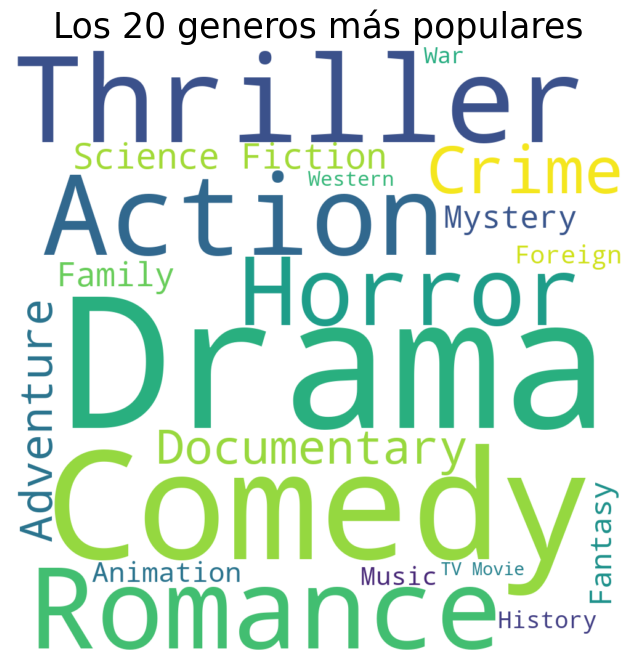

In [41]:
wordcloud = WordCloud(width=1000, height=1000, background_color='white', max_words=20).generate_from_frequencies(freq_genero)

plt.figure(figsize=(8,8))
plt.title("Los 20 generos más populares", fontsize=25)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

### Idioma original

In [42]:
freq_idioma = nltk.FreqDist(df_EDA['original_language'])
freq_idioma

FreqDist({'en': 31894, 'fr': 2385, 'it': 1515, 'ja': 1340, 'de': 1063, 'es': 976, 'ru': 782, 'hi': 503, 'ko': 442, 'zh': 403, ...})

(-0.5, 999.5, 999.5, -0.5)

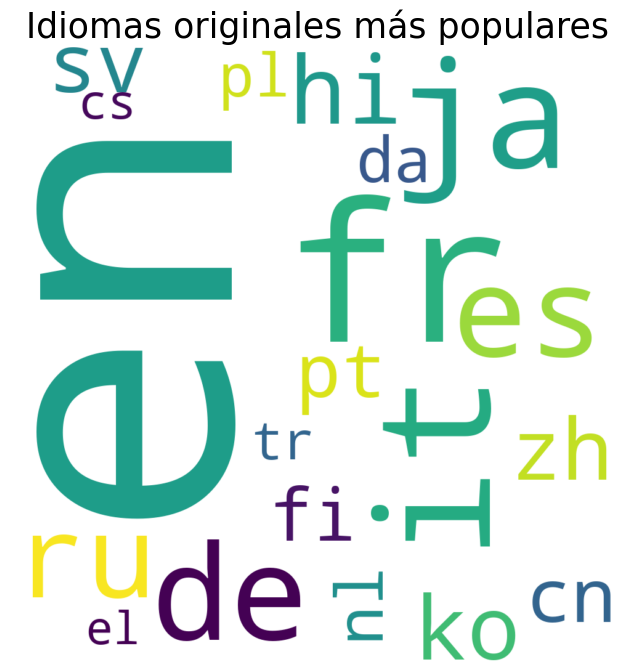

In [43]:
wordcloud = WordCloud(width=1000, height=1000, background_color='white', max_words=20).generate_from_frequencies(freq_idioma)

plt.figure(figsize=(8,8))
plt.title("Idiomas originales más populares", fontsize=25)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

### Palabras más frecuentes en los títulos de películas

In [44]:
df_EDA["title"]

0                                              Toy Story
1                                                Jumanji
2                                       Grumpier Old Men
3                                      Waiting to Exhale
4                            Father of the Bride Part II
                              ...                       
44832                             San Giovanni decollato
44833                                    I due orfanelli
44834    The Crooked E: The Unshredded Truth About Enron
44835                                  One Hundred Steps
44836                                 Color of the Ocean
Name: title, Length: 44837, dtype: object

In [45]:
#Convertimos los titutlos de las películas en una gran cadena de str
titulos_concatenados = ' '.join(df_EDA["title"])

In [46]:
#tokenizamos el texto, lo pasamos a una cadena de texto
token= word_tokenize(titulos_concatenados)
token

['Toy',
 'Story',
 'Jumanji',
 'Grumpier',
 'Old',
 'Men',
 'Waiting',
 'to',
 'Exhale',
 'Father',
 'of',
 'the',
 'Bride',
 'Part',
 'II',
 'Heat',
 'Sabrina',
 'Tom',
 'and',
 'Huck',
 'Sudden',
 'Death',
 'GoldenEye',
 'The',
 'American',
 'President',
 'Dracula',
 ':',
 'Dead',
 'and',
 'Loving',
 'It',
 'Balto',
 'Nixon',
 'Cutthroat',
 'Island',
 'Casino',
 'Sense',
 'and',
 'Sensibility',
 'Four',
 'Rooms',
 'Ace',
 'Ventura',
 ':',
 'When',
 'Nature',
 'Calls',
 'Money',
 'Train',
 'Get',
 'Shorty',
 'Copycat',
 'Assassins',
 'Powder',
 'Leaving',
 'Las',
 'Vegas',
 'Othello',
 'Now',
 'and',
 'Then',
 'Persuasion',
 'The',
 'City',
 'of',
 'Lost',
 'Children',
 'Shanghai',
 'Triad',
 'Dangerous',
 'Minds',
 'Twelve',
 'Monkeys',
 'Wings',
 'of',
 'Courage',
 'Babe',
 'Carrington',
 'Dead',
 'Man',
 'Walking',
 'Across',
 'the',
 'Sea',
 'of',
 'Time',
 'It',
 'Takes',
 'Two',
 'Clueless',
 'Cry',
 ',',
 'the',
 'Beloved',
 'Country',
 'Richard',
 'III',
 'Dead',
 'Presidents'

In [47]:

# Le elimino los signos de puntuación, los espacios y coloco las palabras en minúscula
token2 = []
for word in token:
    word = ''.join(char for char in word if char not in string.punctuation)
    word = word.strip()
    word = word.lower()
    if word:
        token2.append(word)

print(token2)

['toy', 'story', 'jumanji', 'grumpier', 'old', 'men', 'waiting', 'to', 'exhale', 'father', 'of', 'the', 'bride', 'part', 'ii', 'heat', 'sabrina', 'tom', 'and', 'huck', 'sudden', 'death', 'goldeneye', 'the', 'american', 'president', 'dracula', 'dead', 'and', 'loving', 'it', 'balto', 'nixon', 'cutthroat', 'island', 'casino', 'sense', 'and', 'sensibility', 'four', 'rooms', 'ace', 'ventura', 'when', 'nature', 'calls', 'money', 'train', 'get', 'shorty', 'copycat', 'assassins', 'powder', 'leaving', 'las', 'vegas', 'othello', 'now', 'and', 'then', 'persuasion', 'the', 'city', 'of', 'lost', 'children', 'shanghai', 'triad', 'dangerous', 'minds', 'twelve', 'monkeys', 'wings', 'of', 'courage', 'babe', 'carrington', 'dead', 'man', 'walking', 'across', 'the', 'sea', 'of', 'time', 'it', 'takes', 'two', 'clueless', 'cry', 'the', 'beloved', 'country', 'richard', 'iii', 'dead', 'presidents', 'restoration', 'mortal', 'kombat', 'to', 'die', 'for', 'how', 'to', 'make', 'an', 'american', 'quilt', 'se7en', 

In [48]:
#Elimino las palabras con 1 o 2 caracteres
token3 =[]

for word in token2:
  if len(word)>=3:
    token3.append(word)

print(token3)

['toy', 'story', 'jumanji', 'grumpier', 'old', 'men', 'waiting', 'exhale', 'father', 'the', 'bride', 'part', 'heat', 'sabrina', 'tom', 'and', 'huck', 'sudden', 'death', 'goldeneye', 'the', 'american', 'president', 'dracula', 'dead', 'and', 'loving', 'balto', 'nixon', 'cutthroat', 'island', 'casino', 'sense', 'and', 'sensibility', 'four', 'rooms', 'ace', 'ventura', 'when', 'nature', 'calls', 'money', 'train', 'get', 'shorty', 'copycat', 'assassins', 'powder', 'leaving', 'las', 'vegas', 'othello', 'now', 'and', 'then', 'persuasion', 'the', 'city', 'lost', 'children', 'shanghai', 'triad', 'dangerous', 'minds', 'twelve', 'monkeys', 'wings', 'courage', 'babe', 'carrington', 'dead', 'man', 'walking', 'across', 'the', 'sea', 'time', 'takes', 'two', 'clueless', 'cry', 'the', 'beloved', 'country', 'richard', 'iii', 'dead', 'presidents', 'restoration', 'mortal', 'kombat', 'die', 'for', 'how', 'make', 'american', 'quilt', 'se7en', 'pocahontas', 'when', 'night', 'falling', 'the', 'usual', 'suspect

In [49]:
a=set(stopwords.words('english')) 
#Solo va a conservar las palabras que no estén en a 
token4 = [word for word in token3 if word not in a]

print(token4)

['toy', 'story', 'jumanji', 'grumpier', 'old', 'men', 'waiting', 'exhale', 'father', 'bride', 'part', 'heat', 'sabrina', 'tom', 'huck', 'sudden', 'death', 'goldeneye', 'american', 'president', 'dracula', 'dead', 'loving', 'balto', 'nixon', 'cutthroat', 'island', 'casino', 'sense', 'sensibility', 'four', 'rooms', 'ace', 'ventura', 'nature', 'calls', 'money', 'train', 'get', 'shorty', 'copycat', 'assassins', 'powder', 'leaving', 'las', 'vegas', 'othello', 'persuasion', 'city', 'lost', 'children', 'shanghai', 'triad', 'dangerous', 'minds', 'twelve', 'monkeys', 'wings', 'courage', 'babe', 'carrington', 'dead', 'man', 'walking', 'across', 'sea', 'time', 'takes', 'two', 'clueless', 'cry', 'beloved', 'country', 'richard', 'iii', 'dead', 'presidents', 'restoration', 'mortal', 'kombat', 'die', 'make', 'american', 'quilt', 'se7en', 'pocahontas', 'night', 'falling', 'usual', 'suspects', 'guardian', 'angel', 'mighty', 'aphrodite', 'lamerica', 'big', 'green', 'georgia', 'kids', 'round', 'table', 'h

In [50]:
#Creamos un diccionario con las palabras y la frecuencia con la que aparecen
fdist = FreqDist(token4)
fdist

FreqDist({'man': 697, 'love': 668, 'night': 403, 'story': 391, 'life': 388, 'last': 346, 'girl': 308, 'dead': 288, 'one': 285, 'world': 268, ...})

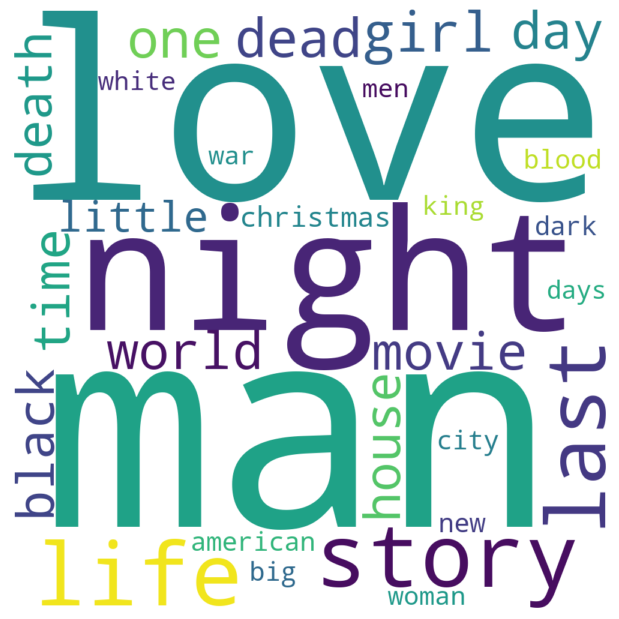

In [51]:
# Crear el objeto WordCloud a partir del diccionario de frecuencias
wordcloud = WordCloud(width=1000, height=1000, background_color='white',  max_words=30).generate_from_frequencies(fdist)

# Mostrar el gráfico del mapa de palabras
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Transformo las columnas categoricas con get dummies

Tomando en cuanta las nubes de actores, directores y generos tomé la decisión de convertir la columna genero por completo ya que me parece que puede aportar información muy interesante al modelo.<br>
Por otro lado, tanto actores como directores me parecen muy importantes también pero teniendo en cuenta la cantidad que hay, decidi solo agregar el top 30 que con mayor cantidad de películas ya que sino mi computadora no podía procesar esa cantidad de información.

### Generos

In [52]:
# Convierte la cadena en una lista evaluando con eval()
df_EDA["name_genres"] =df_EDA["name_genres"].apply(eval)

# Aplica get_dummies() en la columna
generos_dummies = df_EDA["name_genres"].apply(lambda x: pd.Series(1, x)).fillna(0, downcast='infer')


C:\Users\Clarita\AppData\Local\Temp\ipykernel_2564\784374378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EDA["name_genres"] =df_EDA["name_genres"].apply(eval)


In [53]:
generos_dummies

Animation  Comedy  Family  Adventure  Fantasy  Romance  Drama  Action  \
0              1       1       1          0        0        0      0       0   
1              0       0       1          1        1        0      0       0   
2              0       1       0          0        0        1      0       0   
3              0       1       0          0        0        1      1       0   
4              0       1       0          0        0        0      0       0   
...          ...     ...     ...        ...      ...      ...    ...     ...   
44832          0       1       1          0        0        0      0       0   
44833          0       0       0          0        0        0      1       0   
44834          0       0       0          0        0        0      0       0   
44835          1       0       1          0        0        0      0       0   
44836          0       1       0          0        0        0      0       1   

       Crime  Thriller  ...  Telescene Film Group Productions  Aniplex  \
0          0         0  ...                                 0        0   
1          0         0  ...                                 0        0   
2          0         0  ...                                 0        0   
3          0         0  ...                                 0        0   
4          0         0  ...                                 0        0   
...      ...       ...  ...                               ...      ...   
44832      0         0  ...                                 0        0   
44833      0         1  ...                                 0        0   
44834      0         0  ...                                 0        0   
44835      0         0  ...                                 0        0   
44836      1         0  ...                                 0        0   

       GoHands  BROSTA TV  Mardock Scramble Production Committee  \
0            0          0                                      0   
1            0          0                                      0   
2            0          0                                      0   
3            0          0                                      0   
4            0          0                                      0   
...        ...        ...                                    ...   
44832        0          0                                      0   
44833        0          0                                      0   
44834        0          0                                      0   
44835        0          0                                      0   
44836        0          0                                      0   

       Sentai Filmworks  Odyssey Media  Pulser Productions  Rogue State  \
0                     0              0                   0            0   
1                     0              0                   0            0   
2                     0              0                   0            0   
3                     0              0                   0            0   
4                     0              0                   0            0   
...                 ...            ...                 ...          ...   
44832                 0              0                   0            0   
44833                 0              0                   0            0   
44834                 0              0                   0            0   
44835                 0              0                   0            0   
44836                 0              0                   0            0   

       The Cartel  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
44832           0  
44833           0  
44834           0  
44835           0  
44836           0  

[44837 rows x 32 columns]

In [54]:
df_final = pd.concat([df_EDA, generos_dummies], axis=1)

### Directores

In [55]:
#Ordeno el diccionario de mayor a menor según sus values(frecuencia) para hacer la máscara con los directores con más películas
#directores_ordenado = dict(sorted(freq_directores.items(), key=lambda x: x[1], reverse=True))


In [56]:
#mascara_directores = list(directores_ordenado.keys())[:10]

In [57]:
#for director in mascara_directores:
    #df_final[director] = df_final['Director'].apply(lambda x: int(director in x))

### Actores

In [58]:
#Ordeno el diccionario de mayor a menor según sus values(frecuencia) para hacer la máscara con los actores con más películas
#actores_ordenado = dict(sorted(freq_actores.items(), key=lambda x: x[1], reverse=True))


In [59]:
#mascara_actores = list(actores_ordenado.keys())[:20]

In [60]:
#for actor in mascara_actores:
    #df_final[actor] = df_final['Name_cast'].apply(lambda x: int(actor in x))

## Elimino las columnas originales para dejar el df listo para el modelo

In [61]:
df_EDA.columns

Index(['id', 'title', 'budget', 'original_language', 'runtime', 'vote_average',
       'vote_count', 'name_genres', 'Name_cast', 'Director', 'release_month',
       'release_year'],
      dtype='object')

In [62]:
df_final.drop(["original_language", "name_genres",  'Name_cast', 'Director'], axis= 1, inplace= True)

In [63]:
df_final

id                                            title      budget  \
0         862                                        Toy Story  30000000.0   
1        8844                                          Jumanji  65000000.0   
2       15602                                 Grumpier Old Men         0.0   
3       31357                                Waiting to Exhale  16000000.0   
4       11862                      Father of the Bride Part II         0.0   
...       ...                                              ...         ...   
44832   74384                           San Giovanni decollato         0.0   
44833   64043                                  I due orfanelli         0.0   
44834   70207  The Crooked E: The Unshredded Truth About Enron         0.0   
44835   29458                                One Hundred Steps         0.0   
44836  160788                               Color of the Ocean         0.0   

       runtime  vote_average  vote_count  release_month  release_year  \
0         81.0           8.0      5415.0             10          1995   
1        104.0           7.0      2413.0             12          1995   
2        101.0           6.0        92.0             12          1995   
3        127.0           6.0        34.0             12          1995   
4        106.0           6.0       173.0              2          1995   
...        ...           ...         ...            ...           ...   
44832      0.0           6.0         3.0             12          1940   
44833      0.0           4.0         4.0              1          1947   
44834    100.0           2.0         2.0              1          2003   
44835    114.0           8.0       116.0              8          2000   
44836     95.0           3.0         2.0              3          2012   

       Animation  Comedy  ...  Telescene Film Group Productions  Aniplex  \
0              1       1  ...                                 0        0   
1              0       0  ...                                 0        0   
2              0       1  ...                                 0        0   
3              0       1  ...                                 0        0   
4              0       1  ...                                 0        0   
...          ...     ...  ...                               ...      ...   
44832          0       1  ...                                 0        0   
44833          0       0  ...                                 0        0   
44834          0       0  ...                                 0        0   
44835          1       0  ...                                 0        0   
44836          0       1  ...                                 0        0   

       GoHands  BROSTA TV  Mardock Scramble Production Committee  \
0            0          0                                      0   
1            0          0                                      0   
2            0          0                                      0   
3            0          0                                      0   
4            0          0                                      0   
...        ...        ...                                    ...   
44832        0          0                                      0   
44833        0          0                                      0   
44834        0          0                                      0   
44835        0          0                                      0   
44836        0          0                                      0   

       Sentai Filmworks  Odyssey Media  Pulser Productions  Rogue State  \
0                     0              0                   0            0   
1                     0              0                   0            0   
2                     0              0                   0            0   
3                     0              0                   0            0   
4                     0              0                   0            0   
...              

In [64]:
df_final["runtime"].fillna(0, inplace=True)

In [65]:
df_final.to_csv('modelo.csv', index=False)